In [1]:
import numpy as np

from utils.vis_utils import *

from libs.body import Body
from libs.constants import *

from copy import deepcopy

In [2]:
def initialise_stars(configs, weights, G=1):
    # https://observablehq.com/@rreusser/periodic-planar-three-body-orbits
    stars = {}
    num_stars = len(weights)
    for i in range(num_stars):
        idx = 4 * i
        position = [configs[idx], configs[idx + 1]]
        velocity = [configs[idx + 2], configs[idx + 3]]
        weight = weights[i]
        star = Body(weight, np.array(position), np.array(velocity), f'star_{i}')
        star.G = G
        stars[f'star_{i}'] = star
    return stars

In [3]:
# Broucke A14
stars = initialise_stars(
    [
        -0.2637815221,
        0,
        0,
        0.9371630895,
        1.9698126146,
        0,
        0,
        -0.1099503287,
        -1.7060310924,
        0,
        0,
        -0.8272127608,
    ],
    [1, 1, 1],
    G=1,
)

In [4]:
DELTA_T = 0.01
NUM_STEPS = 20000

In [6]:
for star in stars.values():
    print(star.update(list(stars.values()), DELTA_T))

star_0(mass=1.0, position=[-0.26380955  0.00937163], velocity=[-0.00280307  0.93716309])
star_1(mass=1.0, position=[ 1.96978517e+00 -1.09950329e-03], velocity=[-0.00274453 -0.10995033])
star_2(mass=1.0, position=[-1.70597562 -0.00827213], velocity=[ 0.00554759 -0.82721276])


# Calculate positions


In [7]:
star_positions = {}
for k, v in stars.items():
    star_positions[k] = [v.position]

for i in range(0, NUM_STEPS):

    backup_stars = deepcopy(stars)

    for k, star in stars.items():
        other_stars = [v for k, v in backup_stars.items() if v.name != star.name]
        updated_star = star.update(other_stars, DELTA_T)
        stars[k] = updated_star
        star_positions[k].append(updated_star.position)

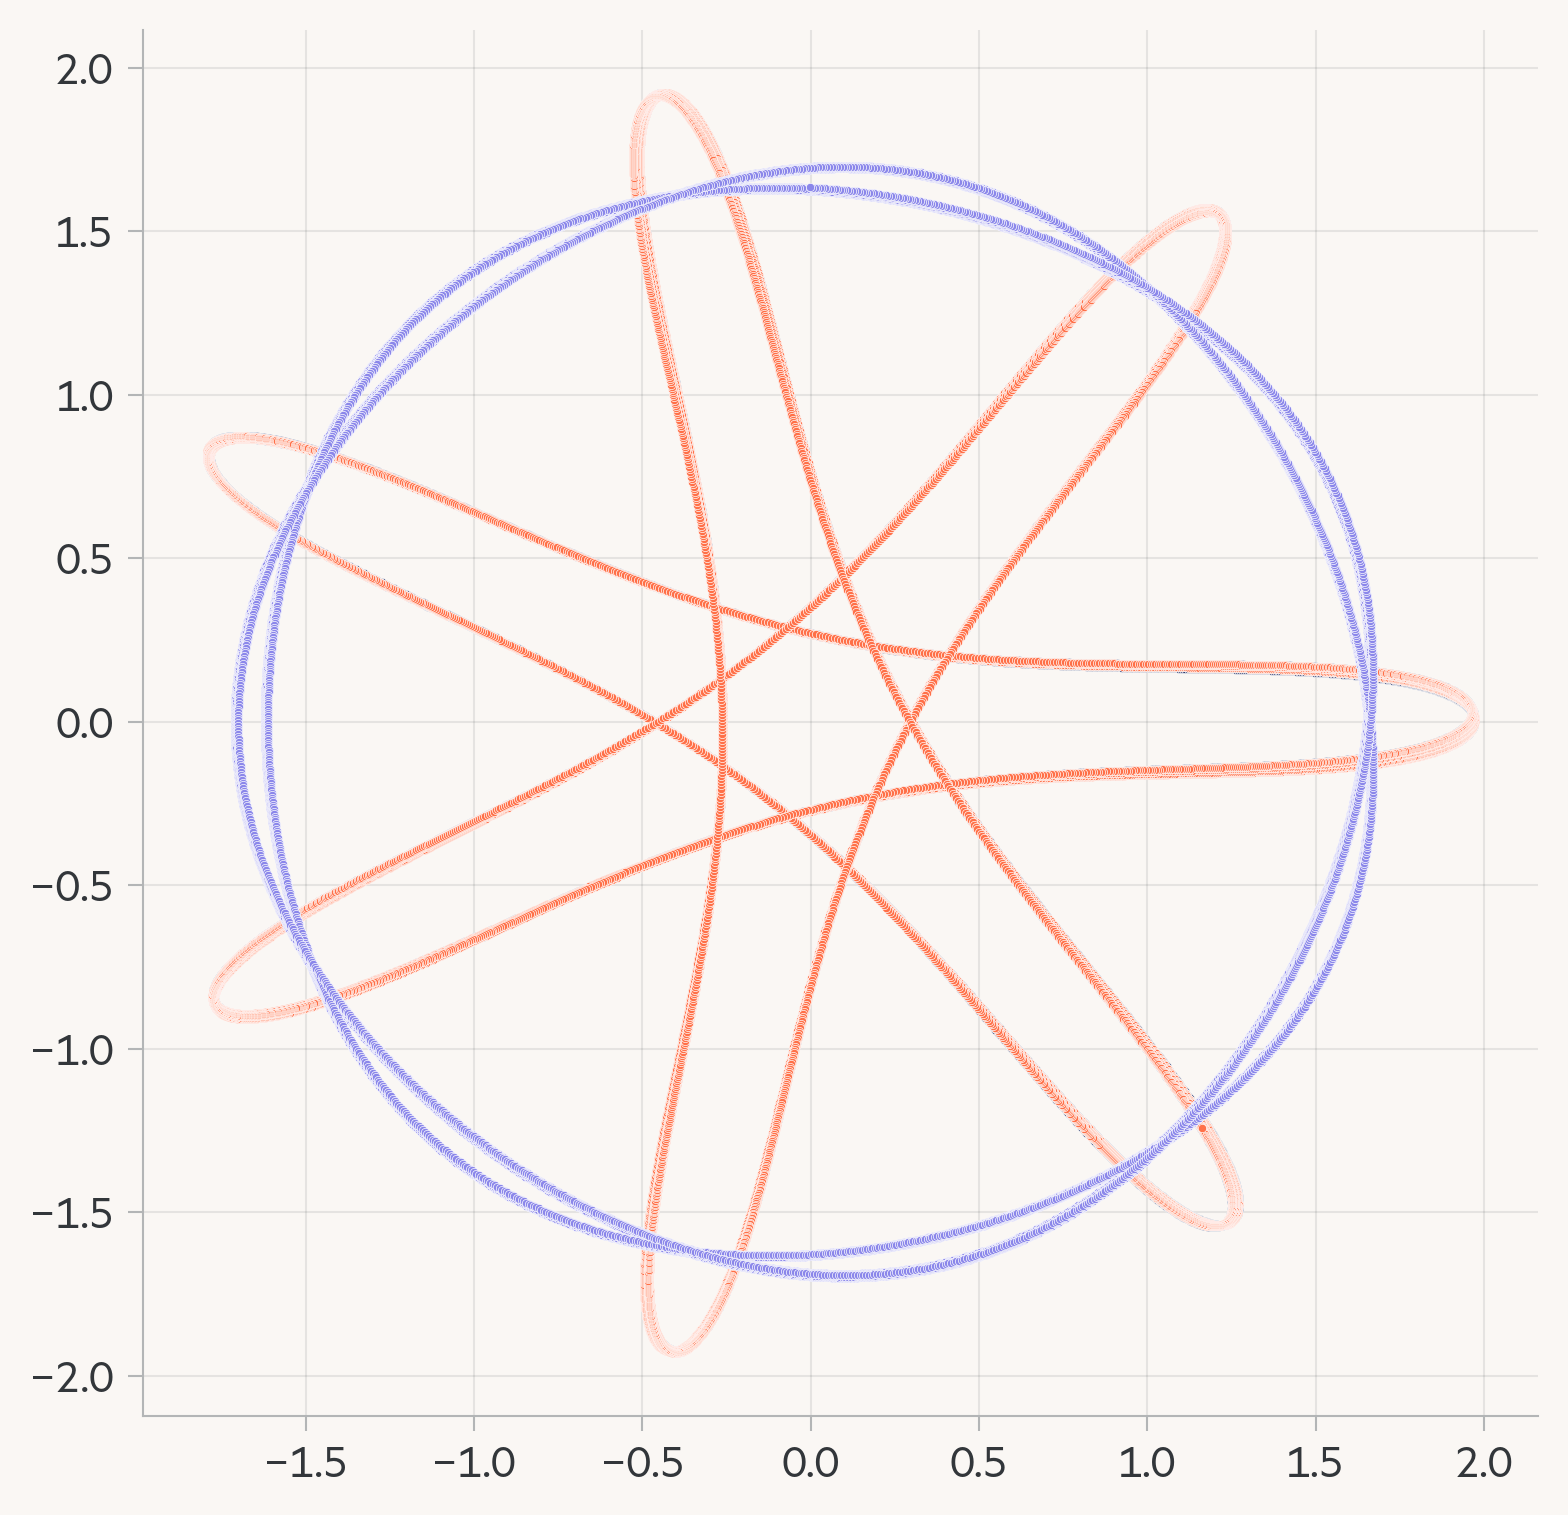

In [8]:
markers = ['o', 'X', 's', 'v', 'd', '^', '<', '>', 'p', 'h']

fig = plt.figure(figsize=(6, 6))

for idx, (k, v) in enumerate(star_positions.items()):
    positions = np.array(v)
    sns.scatterplot(x=positions[:, 0], y=positions[:, 1], s=4)